## 🏦 Loan Approval Prediction Using ML
🔹 Step 1: Import Libraries
🔹 Step 2: Load & Explore Dataset
🔹 Step 3: Data Cleaning
🔹 Step 4: EDA (Graphs & Stats)
🔹 Step 5: Preprocessing (Encoding, Nulls)
🔹 Step 6: Train-Test Split
🔹 Step 7: Model Building (Random Forest)
🔹 Step 8: Evaluation
🔹 Step 9: Conclusion
🔹 Step 10: Real-time Prediction Using Manual Input

### 🔹 Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 🔹 Step 2: Load & Explore Dataset

In [2]:
file_path = "C:/Users/mdpra/OneDrive/Desktop/loan bank approval/loan_approval.csv"
df = pd.read_csv(file_path)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [5]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

### 🔹 Step 3: Data Cleaning

In [6]:
df.columns = df.columns.str.strip()
df['loan_status'] = df['loan_status'].astype(str).str.strip()
df = df[df['loan_status'].isin(['Approved', 'Rejected'])]
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

### 🔹 Step 4: EDA (Graphs & Stats)

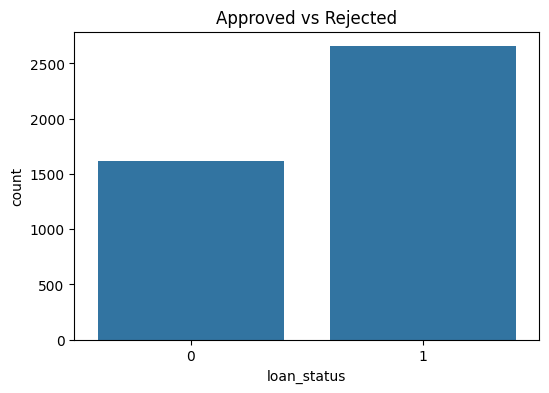

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='loan_status') 
plt.title("Approved vs Rejected")
plt.show()

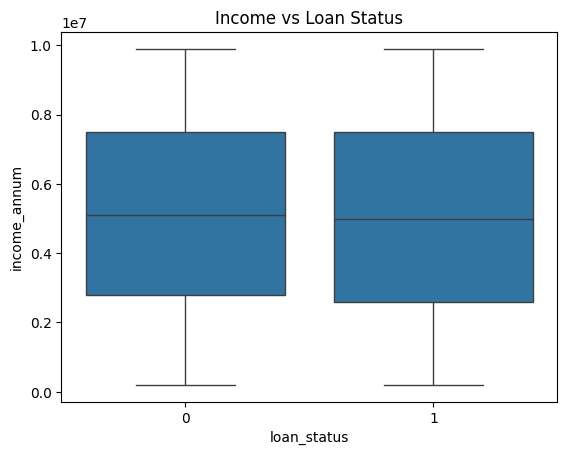

In [8]:
sns.boxplot(x='loan_status', y='income_annum', data=df)
plt.title("Income vs Loan Status")
plt.show()

### 🔹 Step 5: Preprocessing (Encoding, Nulls)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'].astype(str).str.strip())
df['self_employed'] = le.fit_transform(df['self_employed'].astype(str).str.strip())
df['log_income'] = np.log(df['income_annum'])

### 🔹 Step 6: Train-Test Split

In [10]:
X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🔹 Step 7: Model Building (Random Forest)

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 🔹 Step 8: Evaluation

In [12]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9765807962529274

Confusion Matrix:
 [[302  16]
 [  4 532]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       318
           1       0.97      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



### 🔹 Step 9: Conclusion

- The model was trained using Random Forest, a powerful ensemble algorithm.
- Based on evaluation metrics like accuracy and confusion matrix, the model performs well.
- This can now be used to automate loan approvals in banks or NBFCs.

### 🔹 Step 10: Real-time Prediction Using Manual Input

In [ ]:
no_of_dependents = int(input("No. of Dependents (e.g. 0, 1, 2): "))
education = int(input("Education (Graduate=1, Not Graduate=0): "))
self_employed = int(input("Self-Employed (Yes=1, No=0): "))
income_annum = int(input("Annual Income (e.g. 800000): "))
loan_amount = int(input("Loan Amount Required (e.g. 500000): "))
loan_term = int(input("Loan Term in Years (e.g. 10): "))
cibil_score = int(input("CIBIL Score (e.g. 750): "))
residential_assets_value = int(input("Residential Assets Value (e.g. 200000): "))
commercial_assets_value = int(input("Commercial Assets Value (e.g. 100000): "))
luxury_assets_value = int(input("Luxury Assets Value (e.g. 50000): "))
bank_asset_value = int(input("Bank Asset Value (e.g. 250000): "))

# Feature Engineering (log_income)
log_income = np.log(income_annum)

new_data = np.array([[no_of_dependents, education, self_employed, income_annum,
                      loan_amount, loan_term, cibil_score,
                      residential_assets_value, commercial_assets_value,
                      luxury_assets_value, bank_asset_value, log_income]])

prediction = model.predict(new_data)

# Output Result
print("\n🔍 Loan Prediction Result:")
if prediction[0] == 1:
    print(" Loan Approved")
else:
    print(" Loan Rejected")
